In [16]:
# Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Python Data Analysis Library: http://pandas.pydata.org   
statistical data visualization: http://seaborn.pydata.org   
Python 2D plotting library: https://matplotlib.org

# 0. 数据载入 (Load Data)

In [17]:
# load dataset
# source: https://archive.ics.uci.edu/ml/datasets/wine+quality
df = pd.read_csv('./input/winequality-red.csv', sep=';', quotechar='"')

# 1. 探索性分析 (Exploratory Analysis)   

掌握数据的基本情况：
- 数据量
- 特征数
- 目标变量
- 数据类型(整数、浮点数等)
- 取值范围（最大值、最小值、平均值、中位值等）
- 数值分布
- 相关度
- ......

In [18]:
# head samples
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [20]:
# Describe the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [21]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [22]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

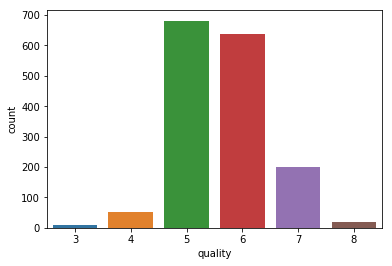

In [23]:
# count of the target variable
sns.countplot(x='quality', data=df)

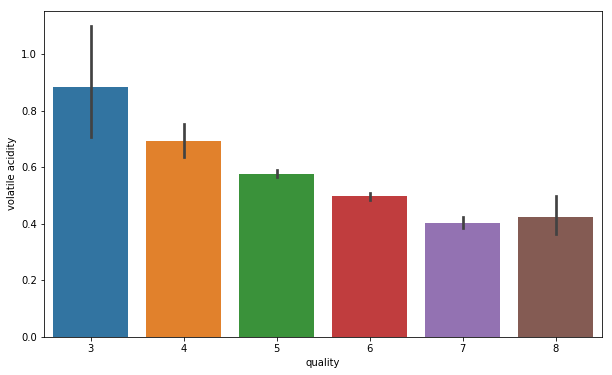

In [24]:
# Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

# 2. 预处理 (Preprocessing)

## 目标：品质分类（好/不好）

In [25]:
# Classified into two categories: tasty/not tasty
def isTasty(quality):
    if quality >= 6.5:
        return 1
    else:
        return 0

In [26]:
df['tasty'] = df['quality'].apply(isTasty)
df.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'tasty'],
      dtype='object')

In [27]:
df['tasty'].value_counts()

0    1382
1     217
Name: tasty, dtype: int64

## 特征值X和目标值y

In [28]:
# Now seperate the dataset as target variable and feature variables
X = df.drop(['quality', 'tasty'], axis = 1)
y = df['tasty']

In [29]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [30]:
y.value_counts()

0    1382
1     217
Name: tasty, dtype: int64

## 数据集合拆分：训练train、验证validation

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state=123)

In [33]:
print 'X_train.shape:', X_train.shape
print 'X_val.shape:', X_val.shape
print 'y_train.shape:', y_train.shape
print 'y_val.shape:', y_val.shape

X_train.shape: (1071, 11)
X_val.shape: (528, 11)
y_train.shape: (1071,)
y_val.shape: (528,)


## 数据标准化

In [34]:
from sklearn.preprocessing import StandardScaler
# Applying Standard scaling to get optimized result
sc = StandardScaler()

In [35]:
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

# 3. 模型选择与训练 (Model Selection and Training)

随机森林分类器：
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(n_estimators=200)

In [38]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# 4. 模型预测 (Predict)

In [39]:
y_pred = rfc.predict(X_val)

# 5. 性能指标 (Performance Matrics)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [41]:
# Confusion matrix for the random forest classification
print(confusion_matrix(y_val, y_pred))

[[451   7]
 [ 43  27]]


In [42]:
# Accuracy score
print(accuracy_score(y_val, y_pred))

0.9053030303030303


In [43]:
# classification report
print(classification_report(y_val, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.98      0.95       458
          1       0.79      0.39      0.52        70

avg / total       0.90      0.91      0.89       528

